1. isna()와 isnull()로 결측치 탐지  
isna()와 isnull() 함수는 데이터프레임의 각 요소가 결측치인지 여부를 확인한다. 두 함수는 동일한 기능을 한다.  
(1)isna(), isnull(): 결측값인 경우 True, 아닌 경우 False를 반환함  
(2)notna(), notnull(): 결측값인 경우 False, 아닌 경우 True를 반환함

In [1]:
import pandas as pd
data = {
    '이름': ['철수', '영희', '민수', '지수'],
    '나이': [25, 30, None, 35],
    '직업': ['학생', '회사원', '학생', None]
}
df = pd.DataFrame(data)
print(df.isna()) 

      이름     나이     직업
0  False  False  False
1  False  False  False
2  False   True  False
3  False  False   True


In [4]:
# 결측치의 총 개수를 확인하려면 isna() 또는 isnull()과 sum()을 조합해 사용함
print(df.isna().sum())  

이름    0
나이    1
직업    1
dtype: int64


가. 결측치 제거  
(1) dropna() 함수를 사용결측치가 포함된 행이나 열을 삭제함  
(2) dropna(axis=0): 결측값이 있는 행을 제거함  
(3) dropna(axis=1): 결측값이 있는 열을 제거함  
(4) how: 'any' 또는 'all'로 설정하여 일부 또는 모든 값이 결측값인 경우에만 제거함  

In [5]:
df_dropped_rows = df.dropna()  # 결측치가 있는 행 제거
print(df_dropped_rows) 

   이름    나이   직업
0  철수  25.0   학생
1  영희  30.0  회사원


In [ ]:
df_dropped_columns = df.dropna(axis=1)  # 결측치가 있는 열 제거
print(df_dropped_columns)

   이름
0  철수
1  영희
2  민수
3  지수


나. 결측치 대체(채우기)  
fillna() 함수를 사용하여 결측치를 특정 값으로 대체할 수 있다. 대체할 값은 평균, 중앙값, 최빈값 등 다양한 방식으로 설정할 수 있다.

In [7]:
df_filled = df.fillna('없음')  # 결측치를 '없음'으로 대체
print(df_filled)

   이름    나이   직업
0  철수  25.0   학생
1  영희  30.0  회사원
2  민수    없음   학생
3  지수  35.0   없음


In [9]:
df['나이'] = df['나이'].fillna(df['나이'].mean())  # '나이' 열의 결측치를 평균값으로 대체
print(df)

   이름    나이    직업
0  철수  25.0    학생
1  영희  30.0   회사원
2  민수  30.0    학생
3  지수  35.0  None


다. 결측치 보간(Interpolation)  
interpolate() 함수를 사용하여 결측치를 주변 값들을 기반으로 보간할 수 있어 시간 데이터를 다룰 때 유용하다. 선형보간법은 앞뒤 데이터 포인트의 값을 이용해 직선으로 연결하여 그 사이의 값을 예측한다.

In [10]:
data = {
    '날짜': pd.date_range('2023-01-01', periods=5),
    '온도': [20, 22, None, 24, 25]
}
df2 = pd.DataFrame(data)

# 선형 보간법으로 결측치 채우기 
df2['온도'] = df2['온도'].interpolate() 
print(df2) 

          날짜    온도
0 2023-01-01  20.0
1 2023-01-02  22.0
2 2023-01-03  23.0
3 2023-01-04  24.0
4 2023-01-05  25.0


In [11]:
# '직업'이 '학생'인 경우 '나이'를 20으로 채우기
df.loc[(df['직업'] == '학생') & (df['나이'].isna()), '나이'] = 20
print(df) 

   이름    나이    직업
0  철수  25.0    학생
1  영희  30.0   회사원
2  민수  30.0    학생
3  지수  35.0  None


In [12]:
# 예시: '나이'가 결측치일 경우, 기본값으로 18을 채우는 함수
def fill_missing_age(x):
    if pd.isna(x):  # 값이 결측값(NaN)인지 확인
        return 18  # 결측값일 경우 18로 대체
    return x  # 결측값이 아니면 원래 값을 반환
#결측값을 fill_missing_age 함수로 처리
df['나이'] = df['나이'].apply(fill_missing_age)  
print(df)

   이름    나이    직업
0  철수  25.0    학생
1  영희  30.0   회사원
2  민수  30.0    학생
3  지수  35.0  None


2. 데이터 전처리: 이상치 탐지 및 처리  
이상치(outlier)는 데이터의 일반적인 패턴에서 극단적으로 다르거나 떨어져 있는 값으로 분석 결과에 큰 영향을 줄 수 있다. 탐지 방법으로는 기술 통계량 확인, 시각화(박스플롯, 히스토그램), IQR(사분위수 범위)을 활용한 방법 등이 있다.   
기술 통계 기반으로는 describe() 함수로 데이터의 기본 통계량을 확인하고, 이상치를 의심할 수 있다. 시각화 기법인 박스플롯과 히스토그램을 통해 데이터의 분포를 확인하여 이상치를 탐지할 수 있다. IQR을 이용해 1사분위수(Q1)와 3사분위수(Q3)의 차이로 이상치를 판단하고, 이 범위를 벗어나는 데이터를 이상치로 간주할 수 있다. 처리 방법으로는 이상치 제거, 특정 값으로 대체, 또는 로그를 사용하는 방법이 있다.

가. 기술 통계 기반 이상치 탐지  
describe() 함수를 사용하여 데이터의 기본 통계량을 확인하고, 이상치를 의심할 수 있음

In [4]:
import pandas as pd
data = {
    '이름': ['철수', '영희', '민수', '지수', '상수'],
    '나이': [25, 30, 22, 35, 120],  # 120은 이상치로 의심됨
    '점수': [90, 85, 95, 80, 88]
}
df = pd.DataFrame(data)

print(df['나이'].describe()) 

count      5.000000
mean      46.400000
std       41.440319
min       22.000000
25%       25.000000
50%       30.000000
75%       35.000000
max      120.000000
Name: 나이, dtype: float64


나. 시각화를 사용한 이상치 탐지  
박스플롯(Box Plot)과 히스토그램을 사용하면 데이터의 분포를 시각적으로 확인할 수 있음

c:\Users\USER\anaconda3\envs\maricecil\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\maricecil\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\maricecil\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\maricecil\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\maricecil\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) 

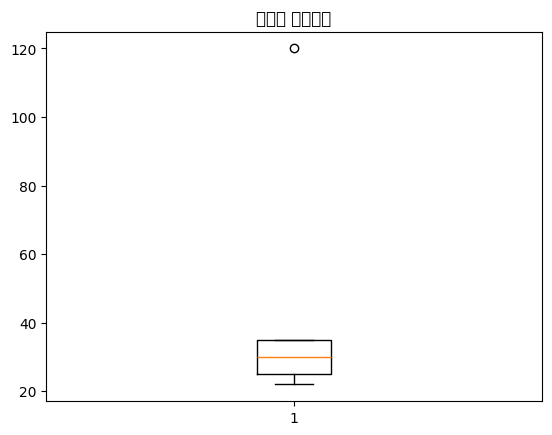

In [2]:
import matplotlib.pyplot as plt

# 박스플롯으로 이상치 시각화
plt.boxplot(df['나이'])
plt.title('나이의 박스플롯')
plt.show()

다. IQR(Interquartile Range)을 사용한 이상치 탐지  
IQR은 1사분위수(Q1)와 3사분위수(Q3)의 차이로, 이 범위를 벗어나는 데이터를 이상치로 간주할 수 있다. 1.5 * IQR보다 작거나 큰 값들을 이상값으로 간주한다.

In [6]:
# quantile()는 백분위수로 0에서 1 사이의 비율을 나타냄. 괄호 안의 숫자는 해당 비율 위치에 있는 값을 의미하므로 하위 25%, 하위 75% 지점의 값을 반환함  
# 사분위수는 4개 구간으로 나눈 값을 의미함(0.25, 0.5, 0.75)

Q1 = df['나이'].quantile(0.25)  # 1사분위수 계산
Q3 = df['나이'].quantile(0.75)  # 3사분위수 계산
IQR = Q3 - Q1  # IQR 계산

lower_bound = Q1 - 1.5 * IQR  # 이상값 하한
upper_bound = Q3 + 1.5 * IQR  # 이상값 상한

outliers = df[(df['나이'] < lower_bound) | (df['나이'] > upper_bound)]  # 이상값 탐지
print(outliers)

   이름   나이  점수
4  상수  120  88


3. 이상치 처리방법  
제거, 대체, 데이터 변환, 모델 기반 처리와 같은 방법으로 이상값을 처리할 수 있음

가. 이상치 제거  
이상값을 데이터에서 제거하여 분석의 정확성을 높일 수 있지만, 중요한 정보를 가진 이상값일 경우 제거하지 않는 것이 좋다.

In [7]:
# 이상치를 제거한 데이터프레임
df_without_outliers = df[(df['나이'] >= lower_bound) & (df['나이'] <= upper_bound)]
print(df_without_outliers)

   이름  나이  점수
0  철수  25  90
1  영희  30  85
2  민수  22  95
3  지수  35  80


나. 이상치를 특정 값으로 대체  
이상값을 데이터셋에서 제거하는 대신, 평균, 중앙값, 특정 값 등으로 대체할 수 있음

In [8]:
# '나이'의 중앙값으로 이상치 대체
median_age = df['나이'].median()
df['나이'] = df['나이'].apply(lambda x: median_age if x > upper_bound or x < lower_bound else x)
print(df)

   이름    나이  점수
0  철수  25.0  90
1  영희  30.0  85
2  민수  22.0  95
3  지수  35.0  80
4  상수  30.0  88


다. 로그변환  
값의 범위를 압축하여 큰 값의 영향을 감소시키고, 데이터의 왜곡을 줄이는 데 효과적임

In [ ]:
import numpy as np

# 'Age' 열에 로그 변환 적용 (자연 로그)
df['Log_Age'] = np.log(df['나이'])  # 자연 로그 사용
# 또는 상용 로그를 사용하려면 np.log10(df['나이'])를 사용
print(df)

   이름    나이  점수   Log_Age
0  철수  25.0  90  3.218876
1  영희  30.0  85  3.401197
2  민수  22.0  95  3.091042
3  지수  35.0  80  3.555348
4  상수  30.0  88  3.401197
